In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
from statsmodels.tsa.arima_model import ARMA,ARIMA


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Airlines+Data.xlsx',index_col='Month',parse_dates=True)

In [3]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [4]:
data.shape

(96, 1)

In [5]:
data.isna().sum()

Passengers    0
dtype: int64

In [6]:
data.index.freq = 'MS'
data.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [7]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


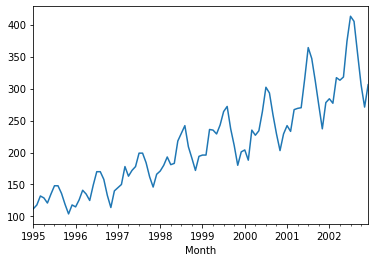

In [8]:
data['Passengers'].plot()
plt.show()

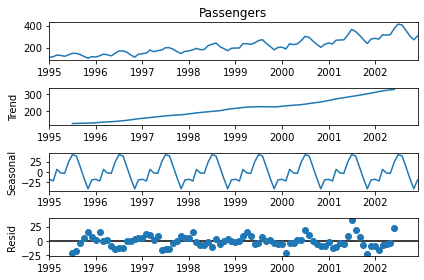

In [9]:
Seasonal_decompose = seasonal_decompose(data['Passengers'],model='addictive')
Seasonal_decompose.plot();

In [10]:
data_train = data.iloc[:76]
data_test  = data.iloc[76:]

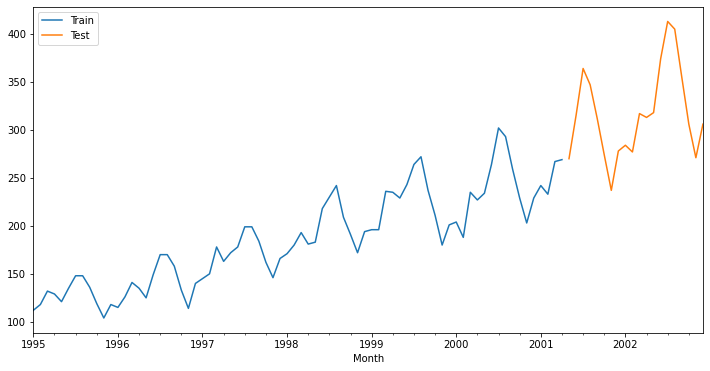

In [11]:
data_train['Passengers'].plot(legend= True,label='Train')
data_test['Passengers'].plot(legend=True,label='Test',figsize=(12,6));

In [12]:
TES = ExponentialSmoothing(data_train['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
TES_fitted = TES.fit()

In [13]:
data_pred = TES_fitted.forecast(20)

In [14]:
data_pred

2001-05-01    265.069319
2001-06-01    294.729925
2001-07-01    326.264573
2001-08-01    328.788864
2001-09-01    292.359431
2001-10-01    258.908898
2001-11-01    227.766218
2001-12-01    258.783901
2002-01-01    265.546532
2002-02-01    264.187119
2002-03-01    307.621328
2002-04-01    299.433200
2002-05-01    298.001678
2002-06-01    331.347333
2002-07-01    366.799864
2002-08-01    369.637774
2002-09-01    328.682328
2002-10-01    291.075882
2002-11-01    256.064019
2002-12-01    290.935355
Freq: MS, dtype: float64

In [59]:
mean_squared_error(data_test,data_pred)

550.2513310286943

In [15]:
TES_mul_add = ExponentialSmoothing(data_train['Passengers'],trend='mul',seasonal='add',seasonal_periods=12)
TES_fitted1 = TES_mul_add.fit()

In [57]:
data_pred1 = TES_fitted1.forecast(20)

In [61]:
mean_squared_error(data_test,data_pred1)

1272.4932339107695

In [63]:
TES_add_mul = ExponentialSmoothing(data_train['Passengers'],trend='add',seasonal='mul',seasonal_periods=12)
TES_fitted2 = TES_add_mul.fit()

In [65]:
data_pred2 = TES_fitted2.forecast(20)

In [66]:
mean_squared_error(data_test,data_pred2)

1147.703448533522

#### Triple exponential model with multiplicative seasonality and multiplicative trend shows the least MSE

In [68]:
RMSE_mul_mul = np.sqrt(mean_squared_error(data_test,data_pred))
RMSE_mul_mul

23.45743658264249

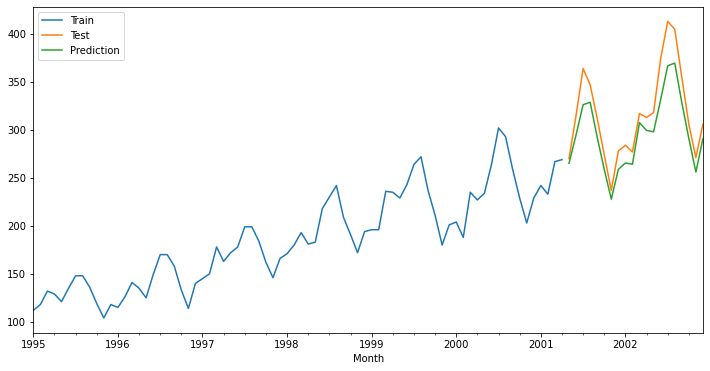

In [64]:
data_train['Passengers'].plot(legend= True,label='Train')
data_test['Passengers'].plot(legend=True,label='Test',)
data_pred.plot(legend=True,label='Prediction',figsize=(12,6));

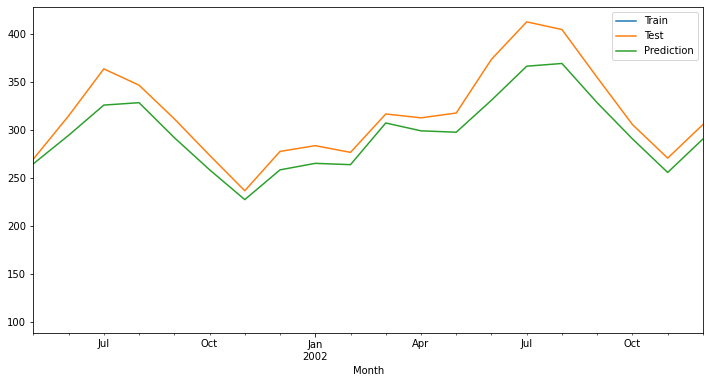

In [17]:
data_train['Passengers'].plot(legend= True,label='Train')
data_test['Passengers'].plot(legend=True,label='Test',)
data_pred.plot(legend=True,label='Prediction',xlim= ['2001-05-01','2002-12-01'],figsize=(12,6));

In [20]:
final_model = ExponentialSmoothing(data['Passengers'],trend='mul',seasonal="mul",seasonal_periods=12).fit()
TES_Forecast = final_model.forecast(20)

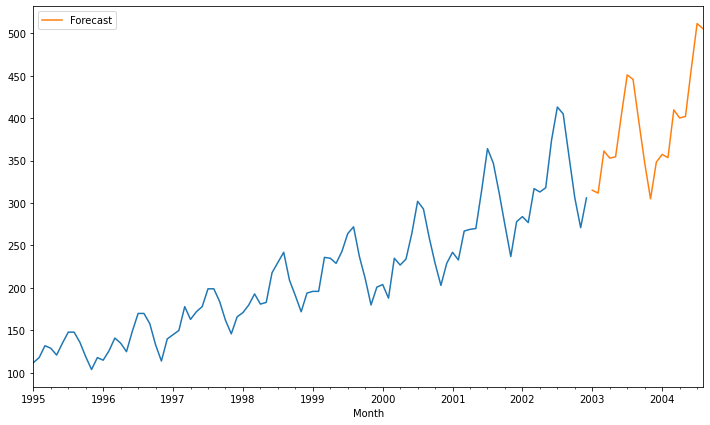

In [21]:
data['Passengers'].plot()
TES_Forecast.plot(legend = True,label='Forecast',figsize=(12,7));

In [22]:
mean_squared_error(data_test['Passengers'],data_pred)

550.2513310286943

In [23]:
np.sqrt(mean_squared_error(data_test['Passengers'],data_pred))

23.45743658264249

In [24]:
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

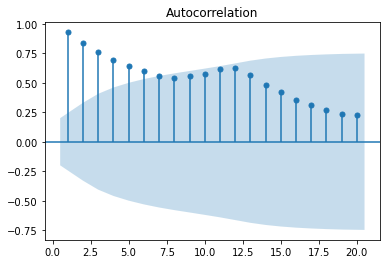

In [25]:
sgt.plot_acf(data['Passengers'],lags=20,zero=False)
plt.show()

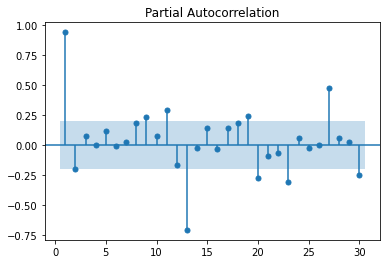

In [26]:
sgt.plot_pacf(data['Passengers'],lags=30,zero=False)
plt.show()

In [27]:
model_ar1 = ARMA(data.Passengers,order=(1,0))

In [28]:
result_ar1 = model_ar1.fit()

In [29]:
result_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(1, 0)   Log Likelihood                -438.831
Method:                       css-mle   S.D. of innovations             23.098
Date:                Mon, 22 Aug 2022   AIC                            883.661
Time:                        11:20:54   BIC                            891.354
Sample:                    01-01-1995   HQIC                           886.771
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              212.3020     42.366      5.011      0.000     129.266     295.339
ar.L1.Passengers     0.9534      0.030     31.820      0.000       0.895       1.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0489           +0.0000j            1.0489            0.0000
-----------------------------------------------------------------------------
"""

In [30]:
model_ar2 = ARMA(data.Passengers,order=(2,0))

In [31]:
result_ar2 = model_ar2.fit()

In [32]:
result_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(2, 0)   Log Likelihood                -434.852
Method:                       css-mle   S.D. of innovations             22.144
Date:                Mon, 22 Aug 2022   AIC                            877.704
Time:                        11:20:54   BIC                            887.961
Sample:                    01-01-1995   HQIC                           881.850
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              214.0091     33.016      6.482      0.000     149.299     278.719
ar.L1.Passengers     1.2246      0.098     12.463      0.000       1.032       1.417
ar.L2.Passengers    -0.2866      0.099     -2.886      0.004      -0.481      -0.092
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0996           +0.0000j            1.0996            0.0000
AR.2            3.1730           +0.0000j            3.1730            0.0000
-----------------------------------------------------------------------------
"""

In [33]:
LLR_test(model_ar1,model_ar2)

0.005

In [34]:
model_ar3 = ARMA(data.Passengers,order=(3,0))

In [35]:
result_ar3 = model_ar3.fit()

In [36]:
result_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(3, 0)   Log Likelihood                -432.832
Method:                       css-mle   S.D. of innovations             21.662
Date:                Mon, 22 Aug 2022   AIC                            875.665
Time:                        11:20:55   BIC                            888.486
Sample:                    01-01-1995   HQIC                           880.847
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              214.7317     40.411      5.314      0.000     135.528     293.936
ar.L1.Passengers     1.2914      0.102     12.699      0.000       1.092       1.491
ar.L2.Passengers    -0.5490      0.161     -3.400      0.001      -0.866      -0.233
ar.L3.Passengers     0.2108      0.104      2.036      0.042       0.008       0.414
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0563           -0.0000j            1.0563           -0.0000
AR.2            0.7741           -1.9727j            2.1192           -0.1905
AR.3            0.7741           +1.9727j            2.1192            0.1905
-----------------------------------------------------------------------------
"""

In [37]:
LLR_test(model_ar2,model_ar3)

0.044

In [38]:
model_ar4 = ARMA(data.Passengers,order=(4,0))

In [39]:
result_ar4 = model_ar4.fit()

In [40]:
result_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(4, 0)   Log Likelihood                -432.603
Method:                       css-mle   S.D. of innovations             21.604
Date:                Mon, 22 Aug 2022   AIC                            877.206
Time:                        11:20:56   BIC                            892.592
Sample:                    01-01-1995   HQIC                           883.425
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              215.3259     43.710      4.926      0.000     129.657     300.995
ar.L1.Passengers     1.2794      0.103     12.434      0.000       1.078       1.481
ar.L2.Passengers    -0.5129      0.170     -3.025      0.002      -0.845      -0.181
ar.L3.Passengers     0.1189      0.170      0.698      0.485      -0.215       0.453
ar.L4.Passengers     0.0725      0.107      0.679      0.497      -0.137       0.282
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0459           -0.0000j            1.0459           -0.0000
AR.2            0.8361           -1.5251j            1.7393           -0.1702
AR.3            0.8361           +1.5251j            1.7393            0.1702
AR.4           -4.3581           -0.0000j            4.3581           -0.5000
-----------------------------------------------------------------------------
"""

In [41]:
LLR_test(model_ar3,model_ar4)

0.498

In [42]:
model_ma1 = ARMA(data.Passengers,order=(0,1))

In [43]:
result_ma1 = model_ma1.fit()

In [44]:
result_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(0, 1)   Log Likelihood                -490.947
Method:                       css-mle   S.D. of innovations             39.706
Date:                Mon, 22 Aug 2022   AIC                            987.893
Time:                        11:20:57   BIC                            995.586
Sample:                    01-01-1995   HQIC                           991.003
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              213.7955      7.913     27.019      0.000     198.287     229.304
ma.L1.Passengers     0.9625      0.034     28.663      0.000       0.897       1.028
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0390           +0.0000j            1.0390            0.5000
-----------------------------------------------------------------------------
"""

In [45]:
d1 = diff(data['Passengers'],k_diff=1)
sts.adfuller(d1)

(-2.150001735920652,
 0.22488942647512628,
 12,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 613.1127223022611)

In [46]:
d2 = diff(data['Passengers'],k_diff=2)
sts.adfuller(d2)

(-11.547980944840823,
 3.5031802363209806e-21,
 11,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 610.2950766130402)

<AxesSubplot:xlabel='Month'>

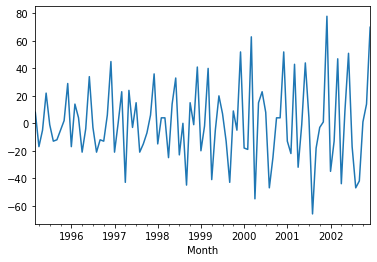

In [47]:
d2.plot()

In [48]:
model= ARIMA(data_train['Passengers'],order=(3,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Passengers   No. Observations:                   74
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -323.195
Method:                       css-mle   S.D. of innovations             18.498
Date:                Mon, 22 Aug 2022   AIC                            658.390
Time:                        11:20:58   BIC                            672.214
Sample:                    03-01-1995   HQIC                           663.905
                         - 04-01-2001                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0046      0.093      0.049      0.961      -0.177       0.187
ar.L1.D2.Passengers     0.1711      0.116      1.479      0.139      -0.056       0.398
ar.L2.D2.Passengers    -0.1427      0.117     -1.217      0.224      -0.373       0.087
ar.L3.D2.Passengers    -0.1082      0.117     -0.925      0.355      -0.338       0.121
ma.L1.D2.Passengers    -1.0000      0.035    -28.598      0.000      -1.069      -0.931
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8069           -1.5813j            1.7753           -0.1749
AR.2            0.8069           +1.5813j            1.7753            0.1749
AR.3           -2.9327           -0.0000j            2.9327           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [49]:
pred_data = results.predict(76,95,dynamic=False,typ='levels')

In [50]:
pred_data

2001-05-01    267.864386
2001-06-01    266.111402
2001-07-01    268.167497
2001-08-01    271.307561
2001-09-01    274.161256
2001-10-01    276.404109
2001-11-01    278.471009
2001-12-01    280.630923
2002-01-01    282.902912
2002-02-01    285.204800
2002-03-01    287.490710
2002-04-01    289.762454
2002-05-01    292.035784
2002-06-01    294.318097
2002-07-01    296.608216
2002-08-01    298.903180
2002-09-01    301.201848
2002-10-01    303.504578
2002-11-01    305.811911
2002-12-01    308.124014
Freq: MS, dtype: float64

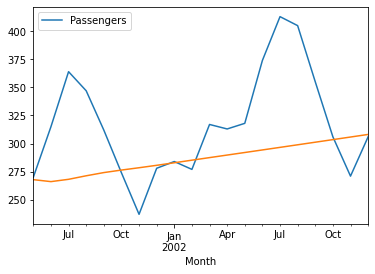

In [51]:
data_test.plot()
pred_data.plot();

In [52]:
mse = mean_squared_error(data_test,pred_data)

In [70]:
RMSE = np.sqrt(mse)
RMSE

53.8030055713461

In [54]:
final_model= ARIMA(data['Passengers'],order=(3,2,1))
model_fit = final_model.fit()

In [55]:
model_forcast = model_fit.predict(len(data),len(data)+20,typ='levels')
model_forcast

2003-01-01    331.408219
2003-02-01    337.641703
2003-03-01    332.785196
2003-04-01    329.606135
2003-05-01    331.284283
2003-06-01    335.248833
2003-07-01    338.716005
2003-08-01    341.049977
2003-09-01    342.912827
2003-10-01    344.930330
2003-11-01    347.219406
2003-12-01    349.614538
2004-01-01    351.975471
2004-02-01    354.282279
2004-03-01    356.575756
2004-04-01    358.887137
2004-05-01    361.219391
2004-06-01    363.562578
2004-07-01    365.909790
2004-08-01    368.260715
2004-09-01    370.617752
Freq: MS, dtype: float64

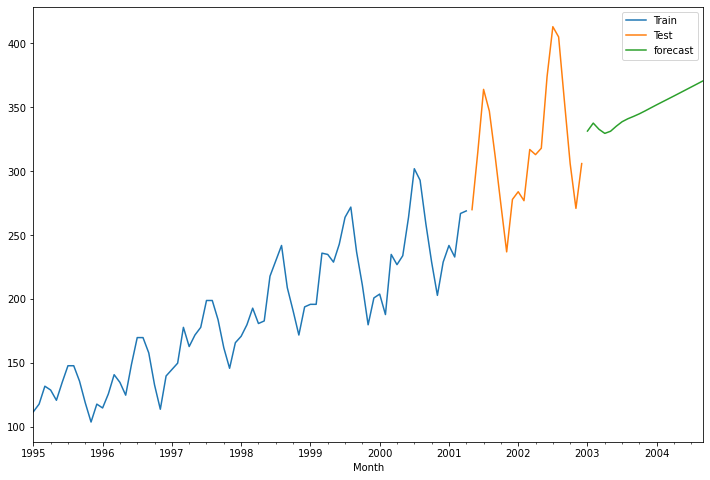

In [56]:
data_train.Passengers.plot(legend=True,label='Train')
data_test.Passengers.plot(legend=True,label='Test')
model_forcast.plot(legend=True,label='forecast',figsize=(12,8))
plt.show();

### The triple exponential smoothing model with multiplicative trend and multiplicative seasonality shows the least value of rmse among above models.Therefore the best model to forecast this data is triple exponential smoothing.